In [267]:
import networkx as nx
import scipy.stats as sp
import scipy.special as spp
import numpy as np
import matplotlib.pyplot as plt
import powerlaw
import mpmath
from NEMtropy import UndirectedGraph, DirectedGraph
from NEMtropy.network_functions import build_adjacency_from_edgelist
!pip install python-pptx

In [21]:
!pip install igraph
import igraph as ig


     |████████████████████████████████| 2.0 MB 1.0 MB/s eta 0:00:01


In [22]:
K = ig.Graph.Read_GML('human-disease.gml')


In [23]:
G = K.to_networkx()

In [243]:
def get_colours(graph) -> list:
    from pptx.dml.color import RGBColor
    out = list(dict(graph.nodes.data('color')).values())
    out = list(map(lambda x: x[4:-1], out))
    out = list(map(lambda x: x.split(','), out))
    out = list(map(lambda x: list(map(float, x)),out))
    out = list(map(lambda x: np.array(x)/255, out))
    return out

In [254]:
def get_sizes(graph) -> list:
    return list(np.array(list(dict(graph.nodes.data('size')).values()))*6)

In [246]:
def get_positions(graph) -> dict:
    positions = {}
    for p in dict(graph.nodes.data()):
        positions[p] = tuple([float(y) for y in graph.nodes.data()[p]['position'][1:-1].split(',')])
    return positions

In [264]:
def get_subgraph(graph, classes: list):
    classes = set(classes)
    graph_nodes = dict(graph.nodes.data('disclass'))
    nodes_wanted = [k for k,v in graph_nodes.items() if graph_nodes[k] in classes]
        
    return graph.subgraph(nodes_wanted)

In [76]:
sbgraph_vertices = [v for v in K.vs if v['disclass']=='Cancer']

In [77]:
sbgraph_vertices

[igraph.Vertex(<igraph.Graph object at 0x7f9d8ed886d0>, 11, {'id': 11.0, 'name': '47', 'color': 'rgb(204, 102, 0)', 'disclass': 'Cancer', 'label': 'Leukemia', 'position': '(80.24811, -165.976)', 'type': 'disease', 'size': 57.80816}),
 igraph.Vertex(<igraph.Graph object at 0x7f9d8ed886d0>, 16, {'id': 16.0, 'name': '59', 'color': 'rgb(204, 102, 0)', 'disclass': 'Cancer', 'label': 'Pancreatic cancer', 'position': '(210.59323, -150.9444)', 'type': 'disease', 'size': 13.397871}),
 igraph.Vertex(<igraph.Graph object at 0x7f9d8ed886d0>, 38, {'id': 38.0, 'name': '112', 'color': 'rgb(204, 102, 0)', 'disclass': 'Cancer', 'label': 'Adenoma, periampullary', 'position': '(140.73738, -229.86423)', 'type': 'disease', 'size': 6.0}),
 igraph.Vertex(<igraph.Graph object at 0x7f9d8ed886d0>, 39, {'id': 39.0, 'name': '113', 'color': 'rgb(204, 102, 0)', 'disclass': 'Cancer', 'label': 'Adenomas', 'position': '(149.27351, -209.93256)', 'type': 'disease', 'size': 7.0253572}),
 igraph.Vertex(<igraph.Graph objec

In [88]:
K.vs[500]

igraph.Vertex(<igraph.Graph object at 0x7f9d8ed886d0>, 500, {'id': 500.0, 'name': '1208', 'color': 'rgb(153, 51, 153)', 'disclass': 'Ophthamological', 'label': 'Pigmented paravenous chorioretinal atrophy', 'position': '(-289.81674, -8.420733)', 'type': 'disease', 'size': 6.0})

In [98]:
G.nodes.data()[500]

{'id': 500.0,
 'name': '1208',
 'color': 'rgb(153, 51, 153)',
 'disclass': 'Ophthamological',
 'label': 'Pigmented paravenous chorioretinal atrophy',
 'position': '(-289.81674, -8.420733)',
 'type': 'disease',
 'size': 6.0}

In [89]:
nx.write_gml(G, "diseases.gml")

In [91]:
pp = nx.read_gml("diseases.gml")

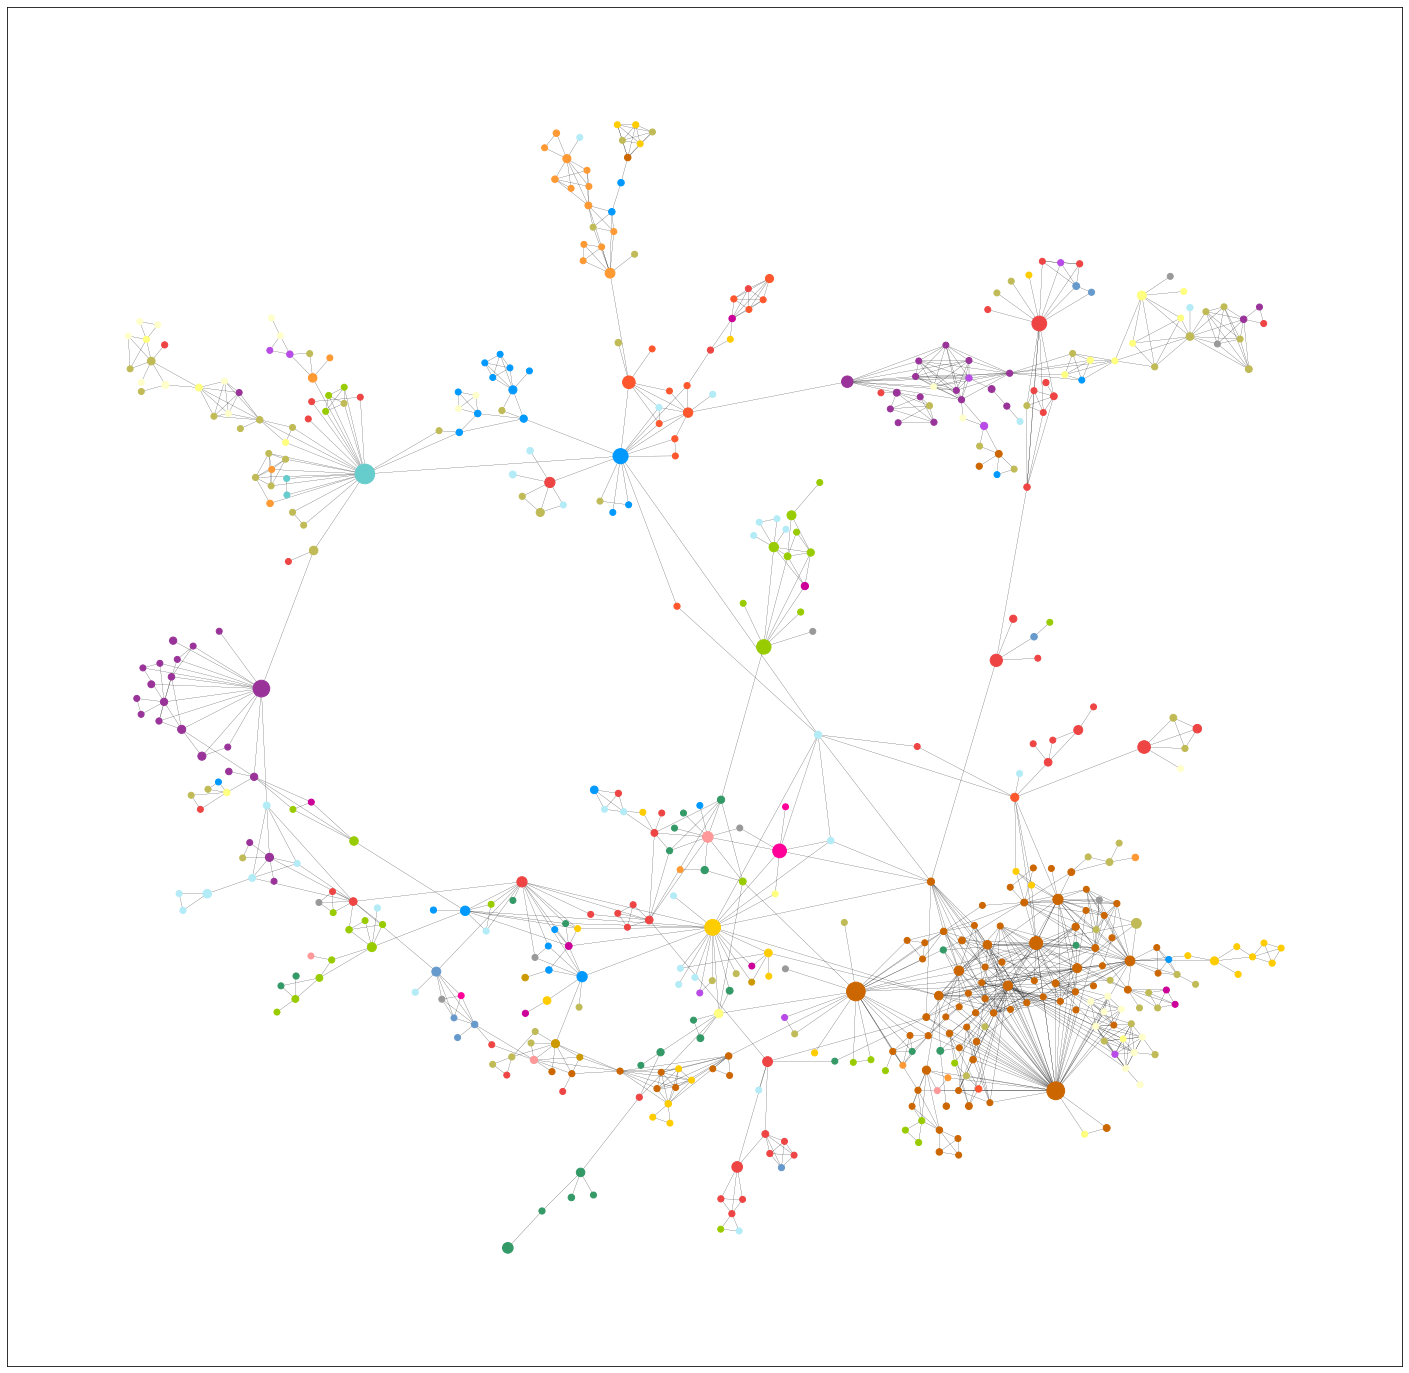

In [268]:
plt.figure(figsize=(25,25)) 
nx.draw_networkx(pp, node_color=get_colours(pp), pos=get_positions(pp), node_size=get_sizes(pp), with_labels=False, width=0.1)

In [213]:
pp.nodes()['0']

{'name': '30',
 'color': 'rgb(238, 68, 68)',
 'disclass': 'Neurological',
 'position': '(-116.486664, -95.29654)',
 'type': 'disease',
 'size': 17.46866}

In [269]:
new = get_subgraph(pp, ['Cancer','Ophthamological'])

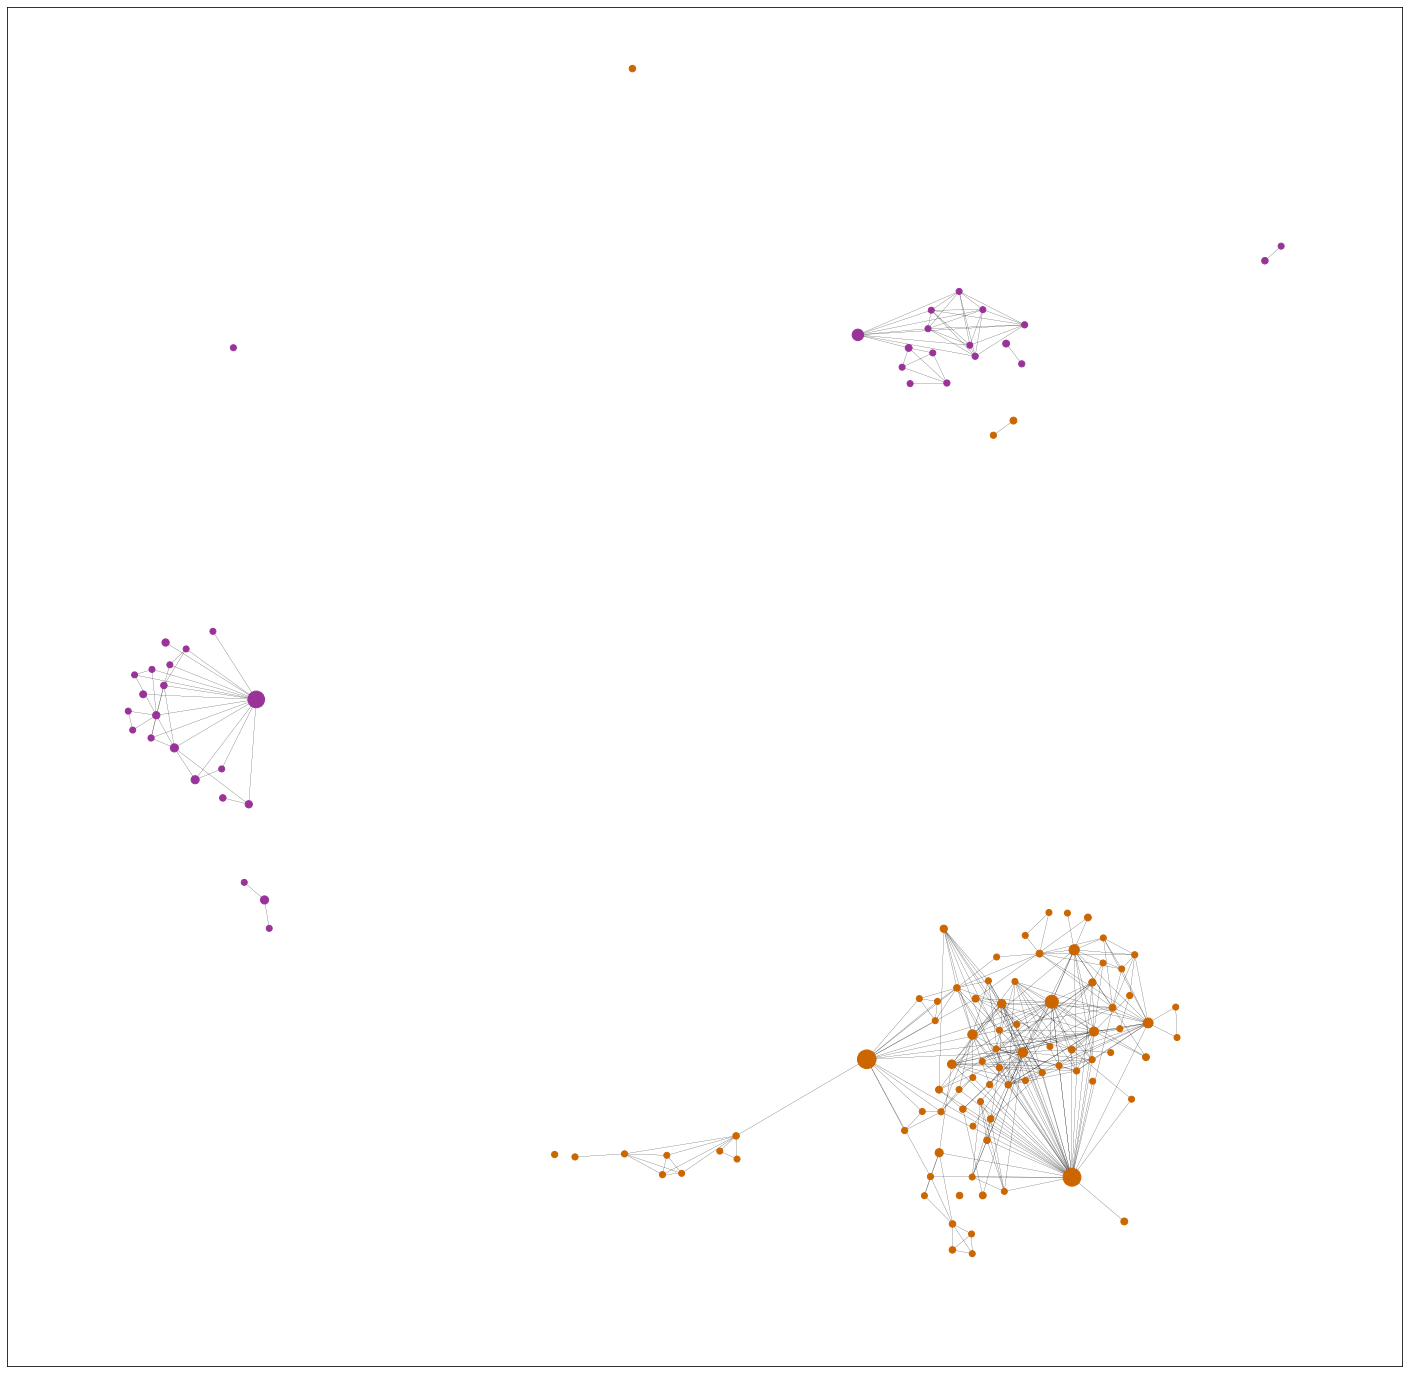

In [270]:
plt.figure(figsize=(25,25)) 
nx.draw_networkx(new, node_color=get_colours(new), pos=get_positions(new), node_size=get_sizes(new), with_labels=False, width=0.1)